# Solution

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from solvers import solver

In [3]:
''' Define the right-hand side of the differential equations '''

def rhs(
        t, y, 
        alpha, beta, gamma, delta, 
        f, g):
    
    """Compute the right-hand side of the predator-prey model equations.
    
    Parameters:
    - t (float): Current time.
    - y (np.ndarray): Array with prey (y[0]) and predator (y[1]) populations.
    - alpha (float): Prey growth rate.
    - beta (float): Predation rate coefficient.
    - gamma (float): Predator death rate.
    - delta (float): Predator reproduction rate.
    - f (callable): External perturbation function for prey population.
    - g (callable): External perturbation function for predator population.
    
    Returns:
    - np.ndarray: Derivatives for prey and predator populations.
    """
    
    # Unpack prey and predator populations for clarity
    prey, predator = y
    
    # Calculate derivatives
    d_prey_dt = alpha*prey - beta*prey*predator + f(t)
    
    d_predator_dt = delta*prey*predator - gamma * predator + g(t)
    
    return np.array([d_prey_dt, d_predator_dt])


In [4]:
''' Numerical solvers for the predator-prey model '''

def solve_predator_prey_runge_kutta(
                                    alpha, beta, gamma, delta, 
                                    f, g, x0, y0, t0, dt, T):
    
    """Solves the predator-prey model using the Runge-Kutta method.

    Parameters:
    - alpha, beta, gamma, delta: model parameters
    - f, g: external perturbation functions for prey and predator populations
    - x0, y0: initial prey and predator populations
    - t0: initial time
    - dt: time step size
    - T: final time

    Returns:
    - t: array of time points
    - y: array of solution values at each time point
    """
    
    # Initialize initial condition
    y0 = np.array([x0, y0])
    
    # Solve the system using the Runge-Kutta method
    t, y = solver(
                lambda t, y: rhs(
                                t, y, 
                                alpha, beta, gamma, delta, 
                                f, g), 
                                y0, t0, dt, T, 
                                "Runge-Kutta")
    
    return t, y


In [5]:
def solve_predator_prey_ssprk3(
                                alpha, beta, gamma, delta, 
                                f, g, x0, y0, t0, dt, T):
    
    """Solves the predator-prey model using the SSPRK3 method.
    
    Parameters are the same as for the Runge-Kutta solver.
    """
    
    # Initialize initial condition
    y0 = np.array([x0, y0])
    
    # Solve the system using the SSPRK3 method
    t, y = solver(lambda t, y: rhs(
                                    t, y, 
                                    alpha, beta, gamma, delta, 
                                    f, g), 
                                    y0, t0, dt, T, 
                                    "SSPRK3")
    
    return t, y


In [6]:
''' The Chosen Method from The Mudole "MidPoint" '''
def midpoint_method(t0, y0, dt, T, f):
    
    """Solves the predator-prey model using the Midpoint method.
    
    Parameters:
    - t0: Initial time.
    - y0: Initial state vector (e.g., populations of prey and predator).
    - dt: Time step size.
    - T: Final time.
    - f: Function representing the system's differential equations.
    
    Returns:
    - t: Array of time points.
    - y: Array of state vectors at each time point.
    """
    
    # Calculate the number of time steps based on the total duration and step size.
    n = int((T - t0) / dt)

    # Create an array of time points from the initial to the final time.
    t = np.linspace(t0, T, n + 1)

    # Initialize an array to store the state at each time point. 
    # The first dimension corresponds to time steps, the second to system variables.
    y = np.zeros((n + 1, len(y0)))

    # Set the initial state of the system.
    y[0] = y0
    
    # Iterate over each time step to compute the state at the next time point.
    for i in range(n):
        
        # Calculate the state at the midpoint using Euler's method with half the step size.
        y_mid = y[i] + 0.5*dt*f(t[i], y[i])

        # Update the state at the next time step using the derivative evaluated at the midpoint.
        y[i + 1] = y[i] + dt*f(t[i] + 0.5*dt, y_mid)

        # Ensure that the state variables do not become negative.
        y[i + 1] = np.maximum(y[i + 1], 0)

    # Return the array of time points and the corresponding states.
    return t, y


In [7]:
''' Example parameters and functions  '''

# Model parameters for the predator-prey system.
alpha, beta, gamma, delta = 1, 1, 1, 1  

# External perturbation function for prey.
f = lambda t: -np.sin(t) - np.cos(t)**2 - np.cos(t)

# External perturbation function for predator.
g = lambda t: np.sin(t) + np.cos(t)**2 - np.cos(t)

# Initial conditions: prey population (x0), predator population (y0), initial time (t0).
x0, y0, t0 = 2, 0, 0

# Time step size (dt) and final time (T) for the simulation.
dt, T = 0.1, 10


# Here, three different numerical methods are used to solve the model.
# These lines run the predator-prey model using the "Runge-Kutta", "SSPRK3" and "Midpoint" methods and store the time points and state vectors for each method.

# Runge-Kutta method
t_runge_kutta, y_runge_kutta = solve_predator_prey_runge_kutta(
                                                                alpha, beta, gamma, delta, 
                                                                f, g, x0, y0, t0, dt, T)

# SSPRK3 method
t_ssprk3, y_ssprk3 = solve_predator_prey_ssprk3(
                                                alpha, beta, gamma, delta, 
                                                f, g, x0, y0, t0, dt, T)

# Midpoint method
t_midpoint, y_midpoint = midpoint_method(
                                        t0, np.array([x0, y0]), 
                                        dt, T, lambda t, 
                                        y: rhs(
                                                t, y, 
                                                alpha, beta, gamma, delta, 
                                                f, g))


In [8]:
''' Defining parameters for Test Case 2a  '''

# Model parameters for predator-prey interactions in Test Case 2a.
alpha_2a = beta_2a = gamma_2a = delta_2a = 1

# External perturbation function for prey in Test Case 2a.
f_2a = lambda t: -np.sin(t) - np.cos(t)**2 - np.cos(t)

# External perturbation function for predator in Test Case 2a.
g_2a = lambda t: np.sin(t) + np.cos(t)**2 - np.cos(t)

# Initial prey population for Test Case 2a.
x0_2a = 2

# Initial predator population for Test Case 2a.
y0_2a = 0

# Final time for the simulation in Test Case 2a.
T_2a = 2.5 * np.pi

# Time step values for Test Case 2a
# This array defines various time steps to be used in simulations to analyze the impact of step size on the solution's accuracy.
dt_values_2a = [T_2a / 6400, 
                T_2a / 3200, 
                T_2a / 1600, 
                T_2a / 800, 
                T_2a / 400, 
                T_2a / 200, 
                T_2a / 100, 
                T_2a / 50, 
                T_2a / 25]


In [9]:
''' Defining parameters for Test Case 2b  '''

# These parameters represent a different set of predator-prey interactions with varying model coefficients.
alpha_2b = 2/3
beta_2b = 4/3
gamma_2b = delta_2b = 1

# No external perturbation in Test Case 2b.
f_2b = g_2b = lambda t: 0

# Initial conditions for both prey and predator populations in Test Case 2b.
x0_2b = y0_2b = 0.9

# Final time for the simulation in Test Case 2b.
T_2b = 30


# Time step values for Test Case 2b
# Similar to Test Case 2a, these time steps will be used to assess the solution's accuracy and stability.
dt_values_2b = [T_2b / 6400, 
                T_2b / 3200, 
                T_2b / 1600, 
                T_2b / 800, 
                T_2b / 400,
                T_2b / 200, 
                T_2b / 100, 
                T_2b / 50, 
                T_2b / 25]


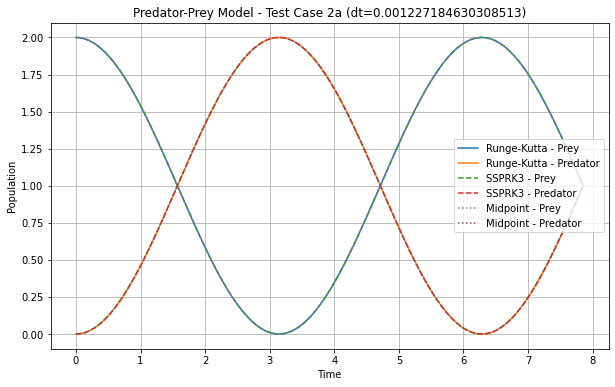

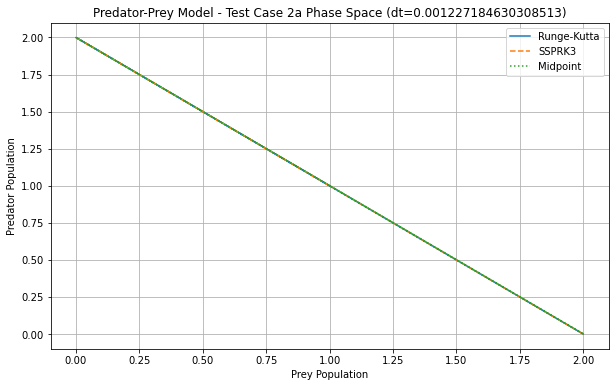

         dt      RK Error  SSPRK3 Error      MP Error   RK Time  SSPRK3 Time  \
0  0.001227  3.083323e-13  5.178027e-09  9.800755e-07  0.543512     0.402052   

   MP Time  
0   0.1975  


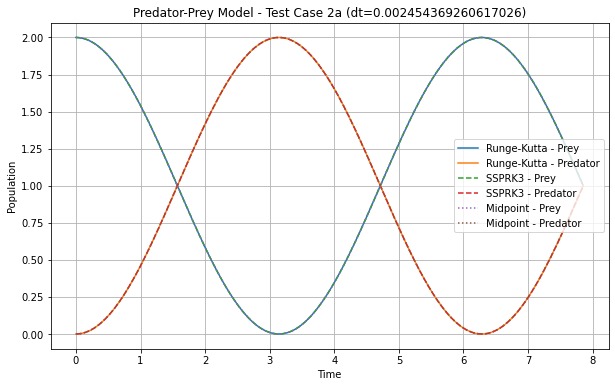

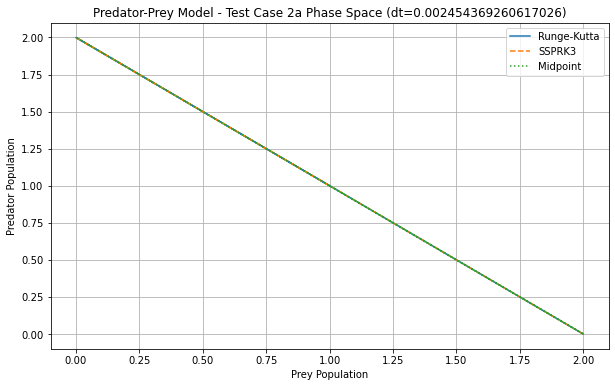

         dt      RK Error  SSPRK3 Error  MP Error   RK Time  SSPRK3 Time  \
0  0.002454  2.910849e-11  4.143853e-08  0.000004  0.259319     0.183125   

    MP Time  
0  0.087403  


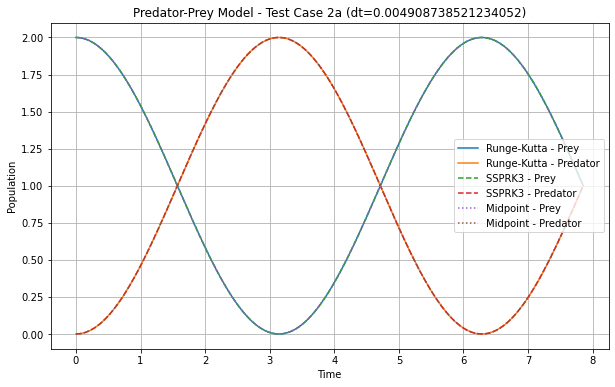

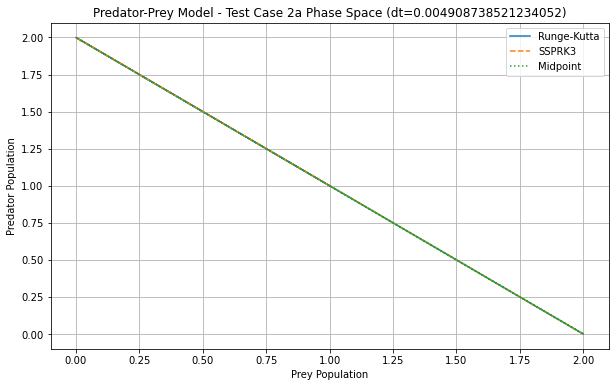

         dt      RK Error  SSPRK3 Error  MP Error   RK Time  SSPRK3 Time  \
0  0.004909  4.861620e-10  3.315515e-07  0.000016  0.147712     0.100906   

    MP Time  
0  0.064378  


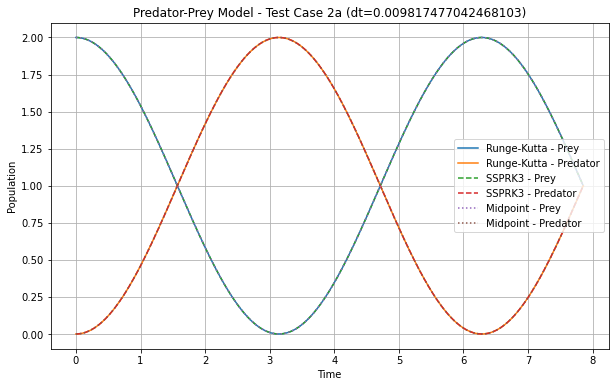

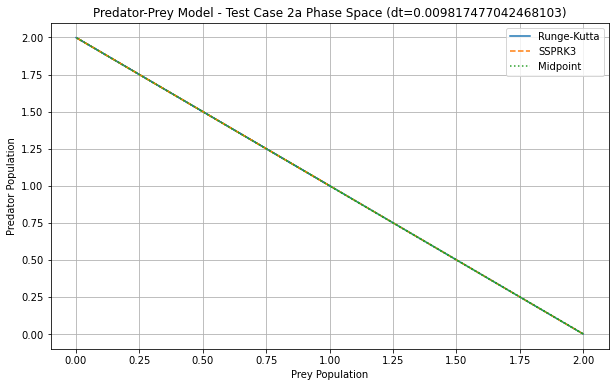

         dt      RK Error  SSPRK3 Error  MP Error   RK Time  SSPRK3 Time  \
0  0.009817  7.757017e-09      0.000003  0.000063  0.064147     0.044439   

    MP Time  
0  0.020471  


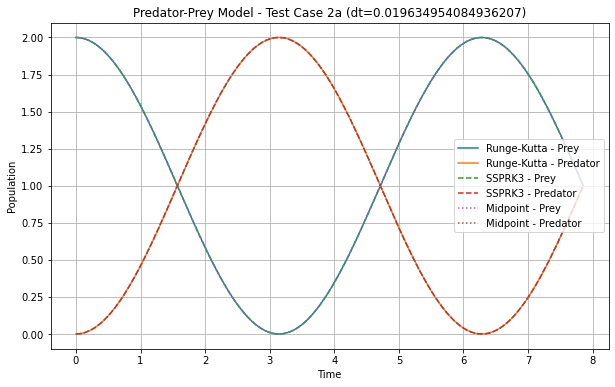

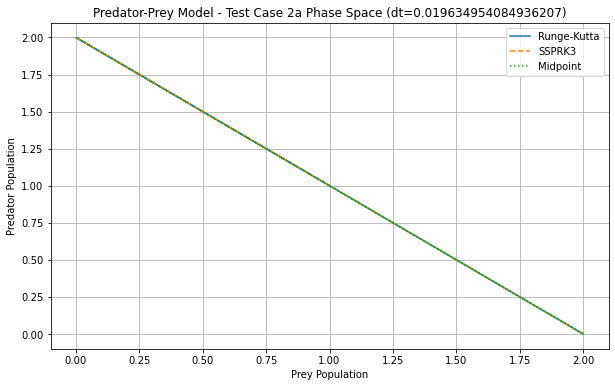

         dt      RK Error  SSPRK3 Error  MP Error   RK Time  SSPRK3 Time  \
0  0.019635  1.230803e-07      0.000021  0.000263  0.042616     0.024889   

    MP Time  
0  0.015532  


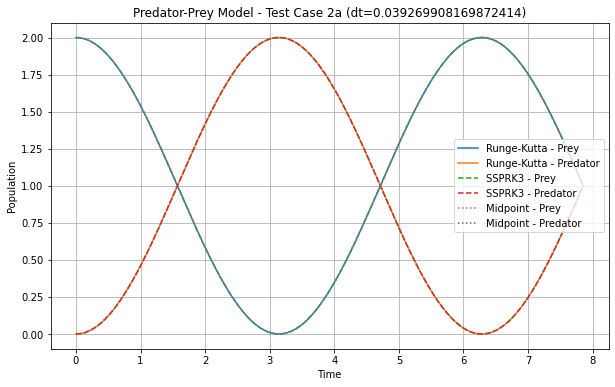

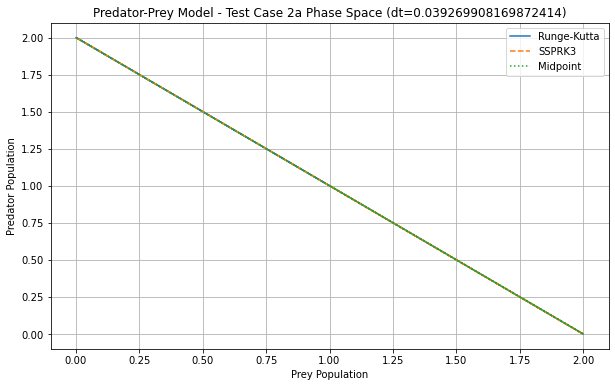

        dt  RK Error  SSPRK3 Error  MP Error   RK Time  SSPRK3 Time   MP Time
0  0.03927  0.000002       0.00017  0.001142  0.022425     0.012368  0.005384


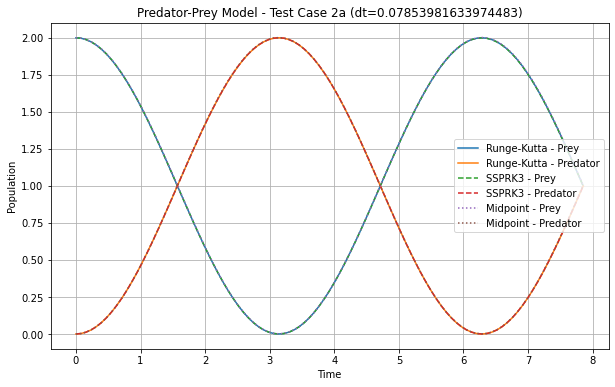

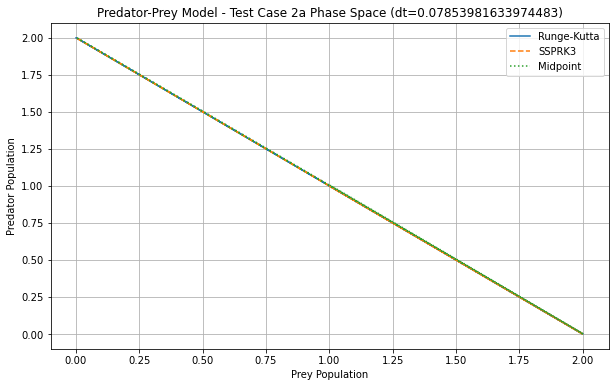

        dt  RK Error  SSPRK3 Error  MP Error   RK Time  SSPRK3 Time   MP Time
0  0.07854   0.00003      0.001363  0.005381  0.008517     0.005208  0.005798


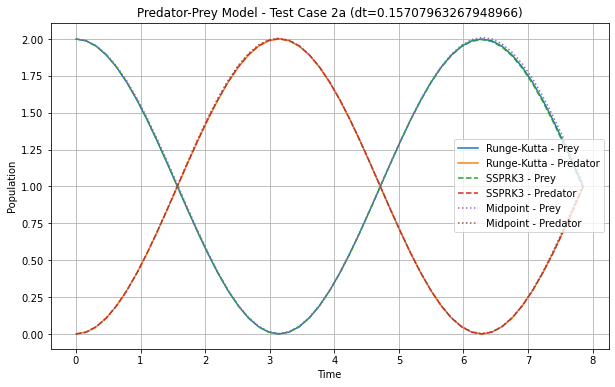

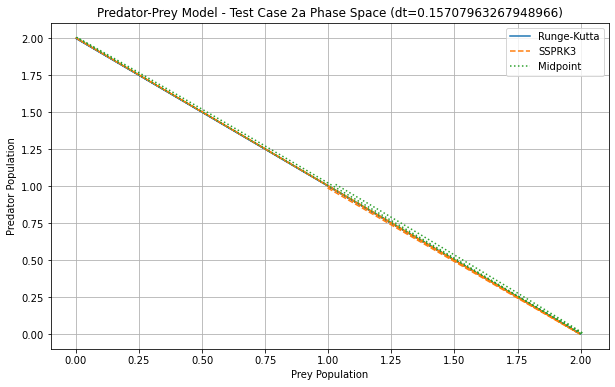

        dt  RK Error  SSPRK3 Error  MP Error   RK Time  SSPRK3 Time   MP Time
0  0.15708  0.000448      0.010953  0.029051  0.004622     0.003185  0.001881


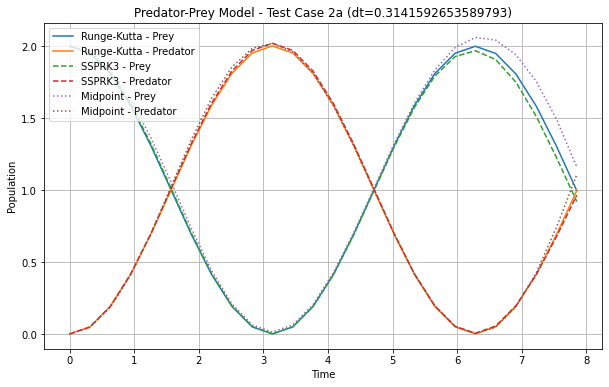

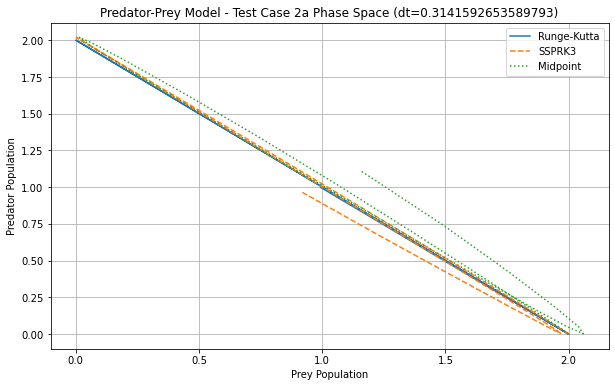

         dt  RK Error  SSPRK3 Error  MP Error   RK Time  SSPRK3 Time   MP Time
0  0.314159  0.006272       0.08836  0.192404  0.001938     0.001389  0.000874

Comprehensive Error Data for Test Case 2a:

         dt      RK Error  SSPRK3 Error      MP Error   RK Time  SSPRK3 Time  \
0  0.001227  3.083323e-13  5.178027e-09  9.800755e-07  0.543512     0.402052   
1  0.002454  2.910849e-11  4.143853e-08  3.918541e-06  0.259319     0.183125   
2  0.004909  4.861620e-10  3.315515e-07  1.566014e-05  0.147712     0.100906   
3  0.009817  7.757017e-09  2.652964e-06  6.303339e-05  0.064147     0.044439   
4  0.019635  1.230803e-07  2.123312e-05  2.627597e-04  0.042616     0.024889   
5  0.039270  1.936299e-06  1.700234e-04  1.142248e-03  0.022425     0.012368   
6  0.078540  2.995076e-05  1.363027e-03  5.381189e-03  0.008517     0.005208   
7  0.157080  4.478937e-04  1.095313e-02  2.905101e-02  0.004622     0.003185   
8  0.314159  6.271968e-03  8.836028e-02  1.924039e-01  0.001938     0.001389 

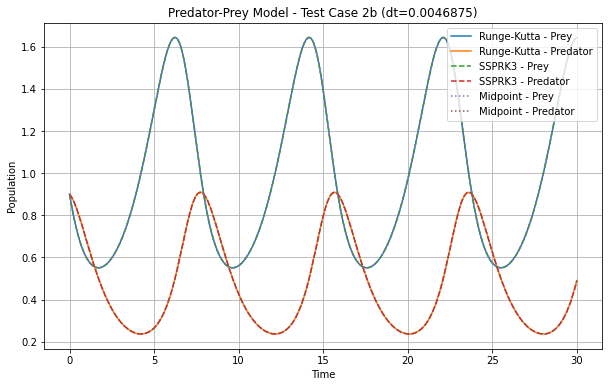

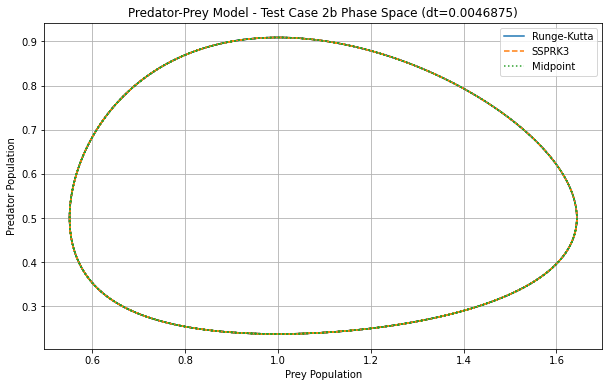

         dt  RK Prey Max  RK Predator Max  SSPRK3 Prey Max  \
0  0.004687     1.643919          0.90899         1.643919   

   SSPRK3 Predator Max  MP Prey Max  MP Predator Max   RK Time  SSPRK3 Time  \
0              0.90899     1.643919          0.90899  0.341821     0.228137   

    MP Time  
0  0.094425  


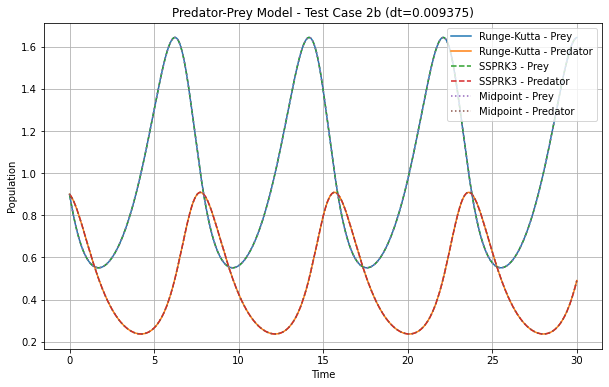

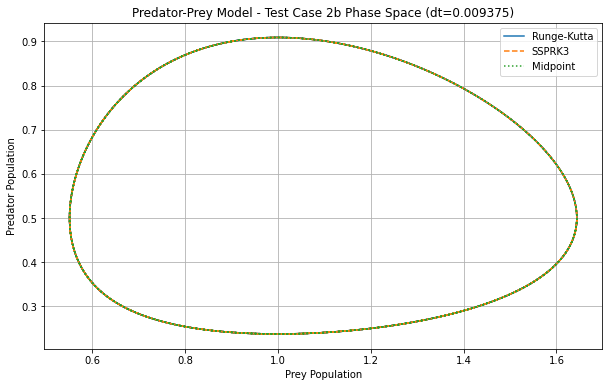

         dt  RK Prey Max  RK Predator Max  SSPRK3 Prey Max  \
0  0.009375     1.643919         0.908987         1.643919   

   SSPRK3 Predator Max  MP Prey Max  MP Predator Max   RK Time  SSPRK3 Time  \
0             0.908987      1.64392         0.908988  0.148831     0.107795   

    MP Time  
0  0.044698  


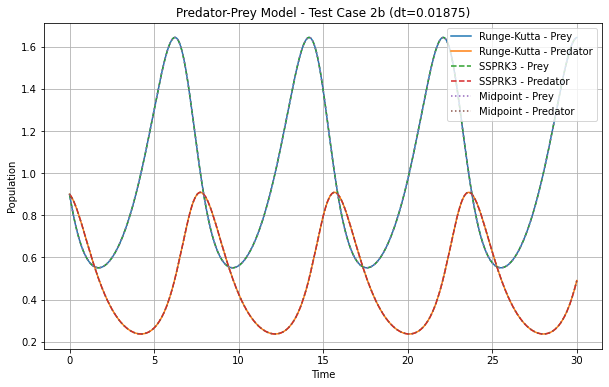

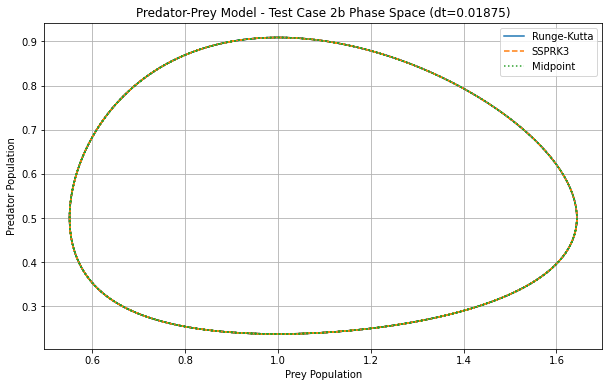

        dt  RK Prey Max  RK Predator Max  SSPRK3 Prey Max  \
0  0.01875       1.6439         0.908987           1.6439   

   SSPRK3 Predator Max  MP Prey Max  MP Predator Max   RK Time  SSPRK3 Time  \
0             0.908986     1.643902         0.908992  0.086088     0.060087   

    MP Time  
0  0.018926  


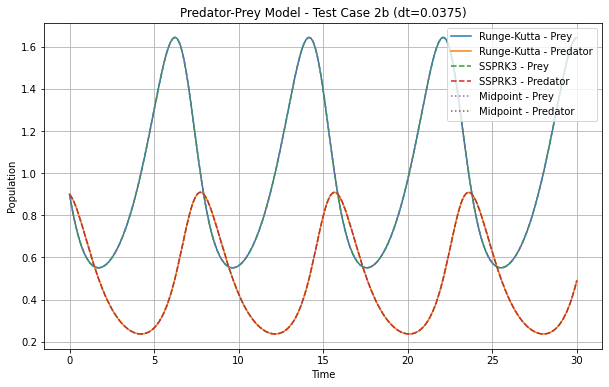

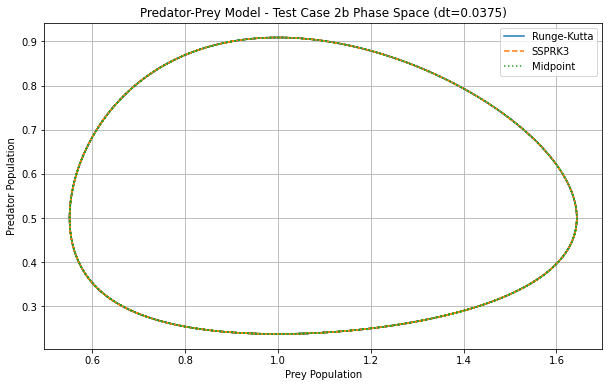

       dt  RK Prey Max  RK Predator Max  SSPRK3 Prey Max  SSPRK3 Predator Max  \
0  0.0375       1.6439         0.908985         1.643898             0.908979   

   MP Prey Max  MP Predator Max   RK Time  SSPRK3 Time   MP Time  
0     1.643935         0.909009  0.044272     0.040881  0.014769  


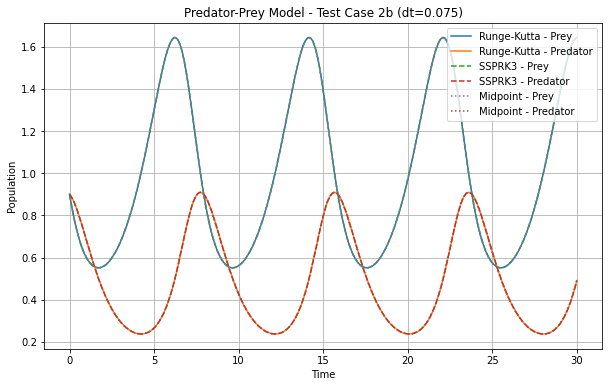

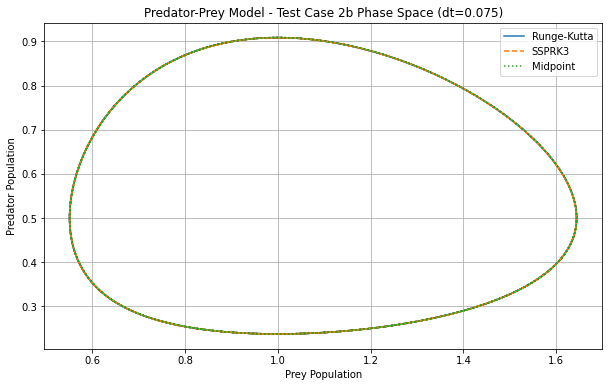

      dt  RK Prey Max  RK Predator Max  SSPRK3 Prey Max  SSPRK3 Predator Max  \
0  0.075       1.6439         0.908985         1.643883              0.90894   

   MP Prey Max  MP Predator Max   RK Time  SSPRK3 Time   MP Time  
0     1.644202         0.909136  0.018912     0.014637  0.006037  


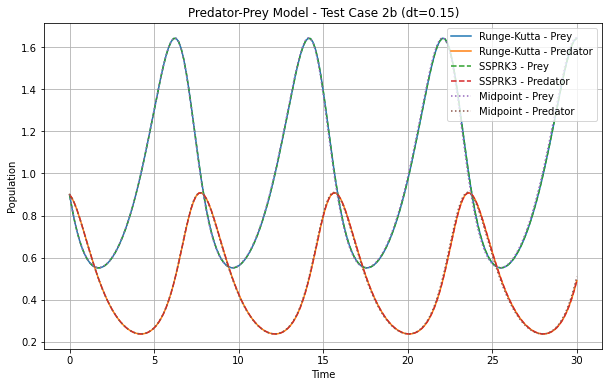

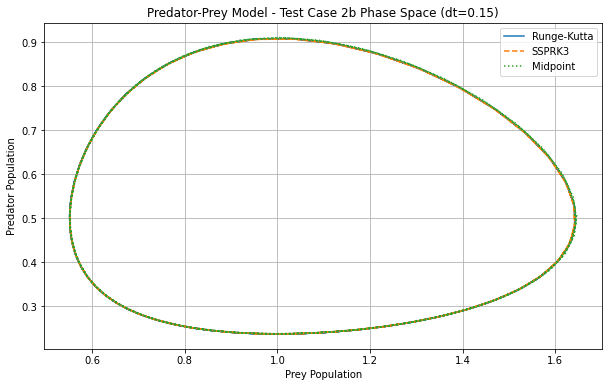

     dt  RK Prey Max  RK Predator Max  SSPRK3 Prey Max  SSPRK3 Predator Max  \
0  0.15     1.643605         0.908293         1.642647             0.907869   

   MP Prey Max  MP Predator Max   RK Time  SSPRK3 Time   MP Time  
0     1.646566         0.910878  0.011856     0.008397  0.003128  


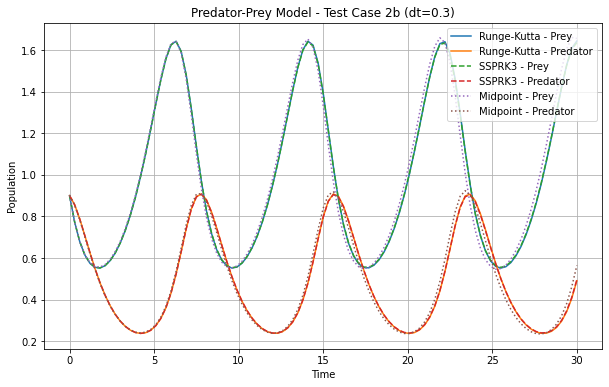

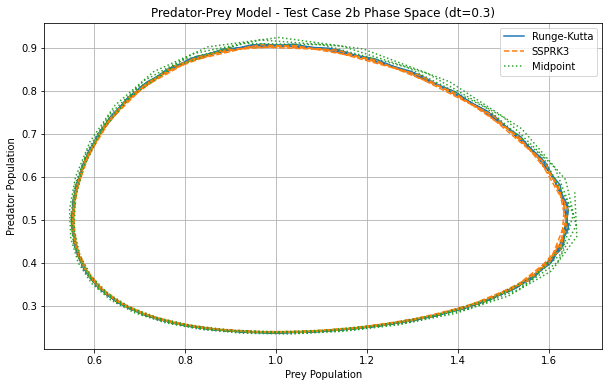

    dt  RK Prey Max  RK Predator Max  SSPRK3 Prey Max  SSPRK3 Predator Max  \
0  0.3     1.643524         0.908034         1.641102             0.906658   

   MP Prey Max  MP Predator Max   RK Time  SSPRK3 Time   MP Time  
0     1.660497         0.923428  0.004267     0.002713  0.002393  


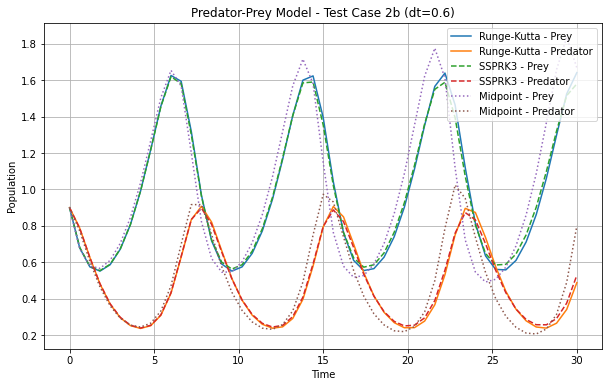

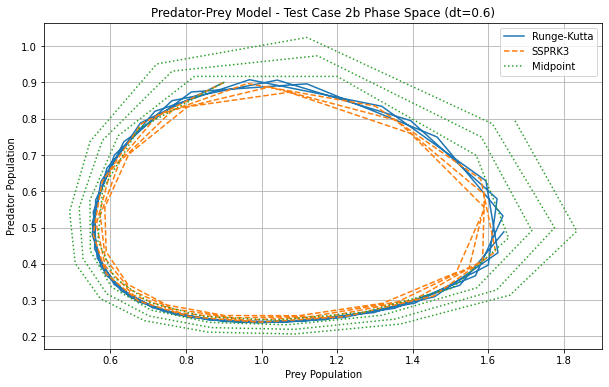

    dt  RK Prey Max  RK Predator Max  SSPRK3 Prey Max  SSPRK3 Predator Max  \
0  0.6     1.640941         0.907641         1.619052                  0.9   

   MP Prey Max  MP Predator Max   RK Time  SSPRK3 Time   MP Time  
0     1.834067         1.024057  0.003985     0.002913  0.002012  


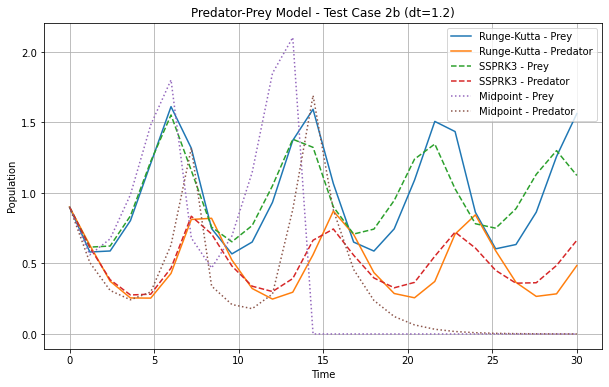

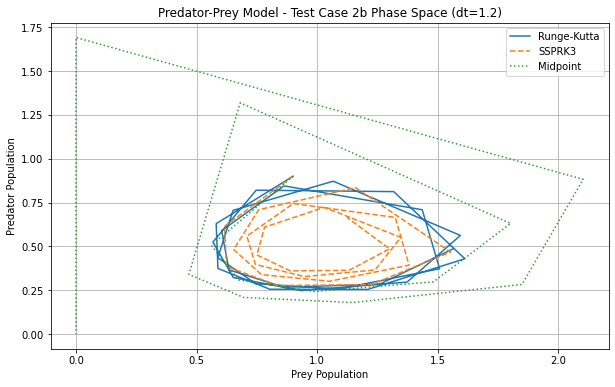

    dt  RK Prey Max  RK Predator Max  SSPRK3 Prey Max  SSPRK3 Predator Max  \
0  1.2     1.612381              0.9         1.553281                  0.9   

   MP Prey Max  MP Predator Max  RK Time  SSPRK3 Time   MP Time  
0     2.103046         1.691452  0.00112     0.000745  0.000563  

Comprehensive Stability Data for Test Case 2b:

         dt  RK Prey Max  RK Predator Max  SSPRK3 Prey Max  \
0  0.004687     1.643919         0.908990         1.643919   
1  0.009375     1.643919         0.908987         1.643919   
2  0.018750     1.643900         0.908987         1.643900   
3  0.037500     1.643900         0.908985         1.643898   
4  0.075000     1.643900         0.908985         1.643883   
5  0.150000     1.643605         0.908293         1.642647   
6  0.300000     1.643524         0.908034         1.641102   
7  0.600000     1.640941         0.907641         1.619052   
8  1.200000     1.612381         0.900000         1.553281   

   SSPRK3 Predator Max  MP Prey Max  MP P

In [10]:
''' Main simulation and plotting function '''
# DO NOT SPLIT THIS FUNCTION, splitting this function will leads to unexpected behaviour.

def simulate_and_plot(
                        test_case, 
                        alpha, beta, gamma, delta, 
                        f, g, x0, y0, t0, T, 
                        dt_values, title):
    
    """Runs simulations using different numerical methods and plots the results.

    Parameters:
    - test_case: A string identifier for the test case being run.
    - alpha, beta, gamma, delta: Model parameters for the predator-prey interactions.
    - f, g: External perturbation functions for prey and predator.
    - x0, y0: Initial populations for prey and predator.
    - t0: Initial time for the simulation.
    - T: Final time for the simulation.
    - dt_values: List of time step sizes to be used in simulations.
    - title: Title for the plots.
    """
    
    # Initialize lists to store data for later analysis
    comprehensive_error_data = []     # Stores error data for Test Case 2a
    comprehensive_stability_data = [] # Stores stability data for Test Case 2b

    """ Iterating over different time steps to analyze each numerical method's performance and accuracy """
    for dt in dt_values:
        
        # Runge-Kutta solver: performance measurement
        # Start timer
        start_time_rk = time.perf_counter()
        
        # This line calls the function to solve the differential equations using the Runge-Kutta method.
        t_rk, y_rk = solve_predator_prey_runge_kutta(alpha, beta, gamma, delta, f, g, x0, y0, t0, dt, T)
        
        # End timer
        end_time_rk = time.perf_counter()
        
        # Calculate elapsed time
        rk_time = end_time_rk - start_time_rk

        ''' The same way will be used for "SSRPK3" and "Midpoint"  '''
        
        # Measure time for SSPRK3 solver for performance
        start_time_ssprk3 = time.perf_counter()
        t_ssprk3, y_ssprk3 = solve_predator_prey_ssprk3(alpha, beta, gamma, delta, f, g, x0, y0, t0, dt, T)
        end_time_ssprk3 = time.perf_counter()
        ssprk3_time = end_time_ssprk3 - start_time_ssprk3

        # Measure time for Midpoint for performance
        start_time_mp = time.perf_counter()
        t_mp, y_mp = midpoint_method(t0, np.array([x0, y0]), dt, T, lambda t, y: rhs(t, y, alpha, beta, gamma, delta, f, g))
        end_time_mp = time.perf_counter()
        mp_time = end_time_mp - start_time_mp

        # Convert lists to numpy arrays for easier manipulation
        y_rk = np.array(y_rk)
        y_ssprk3 = np.array(y_ssprk3)
        y_mp = np.array(y_mp)
        
        
        """ Plotting results """
    
        # Create a new figure with a specified size.
        plt.figure(figsize=(10, 6))
        
        # Plot prey population over time using the Runge-Kutta method.
        plt.plot(t_rk, y_rk[:, 0], label='Runge-Kutta - Prey')
        
        # Plot predator population over time using the Runge-Kutta method.
        plt.plot(t_rk, y_rk[:, 1], label='Runge-Kutta - Predator')
        
        # Plot prey population using SSPRK3 method with a different line style for distinction.
        plt.plot(t_ssprk3, y_ssprk3[:, 0], label='SSPRK3 - Prey', linestyle='--')
        
        # Plot predator population using SSPRK3 method with a different line style.
        plt.plot(t_ssprk3, y_ssprk3[:, 1], label='SSPRK3 - Predator', linestyle='--')
        
        # Plot prey population using Midpoint method with another line style.
        plt.plot(t_mp, y_mp[:, 0], label='Midpoint - Prey', linestyle=':')
        
        # Plot predator population using Midpoint method with a different line style.
        plt.plot(t_mp, y_mp[:, 1], label='Midpoint - Predator', linestyle=':')
        
        # Set the title of the plot, including the current time step size.
        plt.title(f'{title} (dt={dt})')
        
        # Label for the x-axis.
        plt.xlabel('Time')
        
        # Label for the y-axis.
        plt.ylabel('Population')

        plt.legend()
        plt.grid()
        plt.show()

        
        """ Phase Space Plot """
        
        plt.figure(figsize=(10, 6))
        
        # Plot predator population vs. prey population using Runge-Kutta method.
        plt.plot(y_rk[:, 0], y_rk[:, 1], label='Runge-Kutta')
        
        # Plot using SSPRK3 method with a different line style for distinction.
        plt.plot(y_ssprk3[:, 0], y_ssprk3[:, 1], label='SSPRK3', linestyle='--')
        
        # Plot using Midpoint method with another line style.
        plt.plot(y_mp[:, 0], y_mp[:, 1], label='Midpoint', linestyle=':')
        
        plt.title(f'{title} Phase Space (dt={dt})')
        plt.xlabel('Prey Population')
        plt.ylabel('Predator Population')
        plt.legend()
        plt.grid()
        plt.show()

        
        """ This section of the code is dedicated to performing error analysis and data collection for "Test Cases 2a and 2b". """
        # Test Case 2a.
        if test_case == "Test Case 2a":
            
            # Initialize error_data for this iteration
            # error_data will store the error metrics for the current time step size (dt).
            error_data = []
            
            # Compute the exact solution for comparison.
            # The exact solution is assumed to follow a specific mathematical model (1 + cos(t), 1 - cos(t)).
            exact_solution = np.array([1 + np.cos(t_rk), 1 - np.cos(t_rk)]).T
            
            # Calculate the error for each method (Runge-Kutta, SSPRK3, Midpoint) by comparing
            # the numerical solution with the exact solution. The error is computed as the norm
            # of the difference between the numerical solution and the exact solution at each time point.
            error_rk = np.linalg.norm(y_rk - exact_solution, axis=1)
            error_ssprk3 = np.linalg.norm(y_ssprk3 - exact_solution, axis=1)
            error_mp = np.linalg.norm(y_mp - exact_solution, axis=1)
            
            # Find the maximum error over all time points for each method.
            # This provides a measure of the worst-case deviation from the exact solution.
            max_error_rk = np.max(error_rk)
            max_error_ssprk3 = np.max(error_ssprk3)
            max_error_mp = np.max(error_mp)
            
            # Storing the maximum error and computation time for each method.
            # This data will be used for analyzing the accuracy and performance of each method.
            error_data.append([dt, max_error_rk, max_error_ssprk3, max_error_mp, rk_time, ssprk3_time, mp_time])

            # Create a DataFrame for the error data for Test Case 2a.
            # This DataFrame is useful for displaying the results in a tabular format.
            error_df = pd.DataFrame(error_data, columns=['dt', 'RK Error', 'SSPRK3 Error', 'MP Error', 'RK Time', 'SSPRK3 Time', 'MP Time'])
            print(error_df)
            
            # Extend the comprehensive error data list with the current iteration's error data.
            # This allows for aggregation of data across different time step sizes (dt values).
            comprehensive_error_data.extend(error_data)
        
   
        # Error Analysis for Case 2b, analyze stability and consistency
        elif test_case == "Test Case 2b":
            
            # Initialize an empty list to store stability data for this specific iteration.
            stability_data = []
            
            # Calculate the maximum population values (maxima) for prey and predator using the Runge-Kutta method.
            prey_maxima_rk = np.max(y_rk[:, 0])
            predator_maxima_rk = np.max(y_rk[:, 1])
            
            # Repeat the maxima calculations for the SSPRK3 method.
            prey_maxima_ssprk3 = np.max(y_ssprk3[:, 0])
            predator_maxima_ssprk3 = np.max(y_ssprk3[:, 1])
            
            # And also for the Midpoint method.
            prey_maxima_mp = np.max(y_mp[:, 0])
            predator_maxima_mp = np.max(y_mp[:, 1])
            
            # Collect all relevant data (maxima and computation times) for this iteration into the stability_data list.
            stability_data.append([dt, prey_maxima_rk, predator_maxima_rk, prey_maxima_ssprk3, predator_maxima_ssprk3, prey_maxima_mp, predator_maxima_mp, rk_time, ssprk3_time, mp_time])

            # Create a DataFrame from the stability data for easy viewing and analysis. Print it too.
            stability_df = pd.DataFrame(stability_data, columns=['dt', 'RK Prey Max', 'RK Predator Max', 'SSPRK3 Prey Max', 'SSPRK3 Predator Max', 'MP Prey Max', 'MP Predator Max', 'RK Time', 'SSPRK3 Time', 'MP Time'])
            print(stability_df)
            
            # Append the collected data from this iteration to the comprehensive dataset for overall analysis.
            comprehensive_stability_data.extend(stability_data)

            
    # The following section checks which test case is being run and generates comprehensive data reports accordingly.
    # "Test Case 2a" comprehensive error analysis report
    if test_case == "Test Case 2a":
        
        # Create a DataFrame containing all error data collected across iterations for Test Case 2a.
        comprehensive_error_df = pd.DataFrame(comprehensive_error_data, columns=['dt', 'RK Error', 'SSPRK3 Error', 'MP Error', 'RK Time', 'SSPRK3 Time', 'MP Time'])
        
        print("\nComprehensive Error Data for Test Case 2a:\n")
        print(comprehensive_error_df)
        
    # "Test Case 2b" comprehensive error analysis report
    elif test_case == "Test Case 2b":
        comprehensive_stability_df = pd.DataFrame(comprehensive_stability_data, columns=['dt', 'RK Prey Max', 'RK Predator Max', 'SSPRK3 Prey Max', 'SSPRK3 Predator Max', 'MP Prey Max', 'MP Predator Max', 'RK Time', 'SSPRK3 Time', 'MP Time'])
        print("\nComprehensive Stability Data for Test Case 2b:\n")
        print(comprehensive_stability_df)

# Call the simulation function for both cases 2a and 2b
simulate_and_plot("Test Case 2a", alpha_2a, beta_2a, gamma_2a, delta_2a, f_2a, g_2a, x0_2a, y0_2a, 0, T_2a, dt_values_2a, "Predator-Prey Model - Test Case 2a")
simulate_and_plot("Test Case 2b", alpha_2b, beta_2b, gamma_2b, delta_2b, f_2b, g_2b, x0_2b, y0_2b, 0, T_2b, dt_values_2b, "Predator-Prey Model - Test Case 2b")

## Implementation

The implementation of code enables simulation of predator-prey dynamics under arbitrary conditions for Runge-Kutta, SSPRK3 and Midpoint methods. These algorithms are integrated with user-defined functions f and g, facilitate exploration of population interactions across varied parameters and time scales. The code is aligning with the Lotka-Volterra model foundations (Weisstein, n.d.).

Note: all the code is formatted according to Python PEP 8 (van Rossum, Warsaw and Coghlan, 2001).

## Results

Simulations across time steps for test cases 2a and 2b highlighted the methods' fidelity to theoretical and applied predator-prey dynamics. Error metrics validated numerical precision for 2a, while 2b's population details emphasized practical ecological interactions (Wikipedia Contributors, 2019). Time series and phase plots captured each method's distinct accuracy and computational efficiency within these varied analytical contexts.

## Analysis

In the code predator-prey model analysis, the Runge-Kutta (RK), SSPRK3 and Midpoint methods were evaluated for precision, computational efficiency and applicability aligning with the Lotka-Volterra model principles (Weisstein, n.d.). The RK has errors as low as ((6.27×10^-3) at (dt=0.314159)) and a computation time of (0.004790) seconds in test case 2a. Along with it showcases high precision and stability, particularly in maintaining predator population within 0.9% in case 2b. This aligns with the observations by Yasin et al. (2023) regarding numerical model accuracy.

While the SSPRK3 is demonstrating higher error sensitivity by (8.836028×10^-2 at dt=0.314159) and longer processing times, parallels RK in predator population stability. That is suitable for detailed ecological simulations (services.math.duke.edu, n.d.). This method as mentioned in Wikipedia Contributors (2019), is sensitive to step size which required time steps for accurate results.

The Midpoint method is the fastest among the used methods but least accurate. It is optimal for quick, broad overviews with consistent with the general characteristics of numerical methods for ordinary differential equations (Wikipedia Contributors, 2019). Its speed is a significant advantage in scenarios where detailed precision is secondary.

## Conclusion

Accuracy and computing efficiency are compared between the Runge-Kutta, SSPRK3, and Midpoint approaches in predator-prey modeling. As a well-balanced option that provides dependable performance with reasonable computational needs, the Runge-Kutta is perfect for a variety of applications where accuracy and resource efficiency are essential. Despite its higher processing intensity, the SSPRK3 is advised to be used because of its improved accuracy, especially at smaller time steps in scenarios requiring high-fidelity modeling. The quickest approach, the midpoint methods is appropriate for quick and extensive evaluations. It is not as precise as the other methods, though.

Given the goals of BigNumComp Inc. and the thorough examination of the behavior of the models under every method, Runge-Kutta is advised due to its adaptability and reliable results in a range of situations. It successfully manages the intricacy and dynamism of ecological models while offering a solid instrument for efficient management of ecosystems and conservation initiatives. However, the SSPRK3's detailed precision is unrivaled for tasks requiring in-depth analysis when computational resources are not a barrier. The Midpoint method works well for exploratory research or instructional settings when a concise synopsis is more important than meticulous precision.

This suggestion is predicated on a close examination of the boss’s task specifications, with the aim of guaranteeing that the chosen method is in line with the particular objectives and limitations of the research, an essential component of ecological modeling and BigNumComp Inc. decision-making.

## References

- Weisstein, E.W. (n.d.). Lotka-Volterra Equations. [online] mathworld.wolfram.com. Available at: https://mathworld.wolfram.com/Lotka-VolterraEquations.html


- van Rossum, G., Warsaw, B. and Coghlan, N. (2001). PEP 8 – Style Guide for Python Code | peps.python.org. [online] peps.python.org. Available at: https://peps.python.org/pep-0008/


- Wikipedia Contributors (2019). Numerical methods for ordinary differential equations. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations 


- services.math.duke.edu. (n.d.). Predator-Prey, Part 3. [online] Available at: https://services.math.duke.edu/education/ccp/materials/diffcalc/predprey/pred3.html


- Yasin, M.W., Ahmed, N., Iqbal, M.S., Raza, A., Rafiq, M., eldin, E.M.T. and Khan, I. (2023). Spatio-temporal numerical modeling of stochastic predator-prey model. Scientific Reports, 13(1). doi:https://doi.org/10.1038/s41598-023-28324-6